# Exploratory Data Analises

In [1]:
import pandas as pd

heart_df = pd.read_csv('../data/heart.csv', sep = ',')

heart_df.rename(columns={'HeartDisease':'label'}, inplace=True)
heart_df.head(5)

heart_df.columns



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'label'],
      dtype='object')

### Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    Por que essa classificação é importante?
    Angina típica (TA) aumenta muito a suspeita de doença arterial coronariana.

    Angina atípica (ATA) exige mais investigação (teste de esforço, angiografia).

    Dor não anginosa (NAP) geralmente tem causas menos graves.

    Assintomáticos (ASY) podem precisar de rastreio, especialmente se tiverem fatores de risco (hipertensão, diabetes).

    Se estiver analisando dados médicos (como em um dataset de cardiologia), essa variável ajuda a estratificar o risco dos pacientes.

4. RestingBP: resting blood pressure [mm Hg] quanto mais alto maior a chance de ataque
    Contexto em datasets médicos:

    Em modelos preditivos (ex.: prever doenças cardíacas), o RestingBP é uma variável chave.

    Valores extremos (muito altos ou muito baixos) podem indicar emergências (ex.: choque, crise hipertensiva).

5. Cholesterol: serum cholesterol [mm/dl]
    Por que essa variável é importante?
    Risco cardiovascular:

    Níveis elevados estão ligados a aterosclerose, infarto e AVC.

    Valores altos de LDL (> 130 mg/dL) são especialmente preocupantes.
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
alto nivel de acucar danifica vaso sanguineo, o que aumenta a probabilidade de ataque cardiaco

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    Normal:
    Interpretação: Sem sinais imediatos de anomalias cardíacas.

    ST:
    Interpretação: Pode sugerir falta de oxigênio no músculo cardíaco (isquemia) ou lesão miocárdica.

    LVH (Left Ventricular Hypertrophy):
    Interpretação: Associada a hipertensão arterial não controlada ou estenose aórtica, aumentando o risco de insuficiência cardíaca e arritmias.


8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    Pacientes com MaxHR significativamente abaixo do esperado têm maior risco de:
    Isquemia miocárdica (o coração não recebe sangue suficiente durante o esforço).
    Infarto prévio não diagnosticado.

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Pacientes com ExerciseAngina = Y têm maior risco de infarto, pois:

    A angina sugere isquemia cardíaca (falta de oxigênio no músculo cardíaco).

    Pode indicar placas ateroscleróticas nas artérias coronárias.

    Em modelos preditivos, essa variável costuma ser um forte preditor de eventos cardiovasculares.
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
    Oldpeak > 1.0 mV é um preditor forte de:

    Doença arterial coronariana (DAC).

    Infarto do miocárdio futuro.

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    A variável ST_Slope descreve o padrão do segmento ST no eletrocardiograma (ECG) registrado durante o pico de esforço em um teste de exercício (como teste ergométrico). Ela é categórica e indica a direção da inclinação do segmento ST, que reflete a resposta do coração ao estresse físico. Essa variável é um importante marcador de isquemia miocárdica e risco cardiovascular.

    Down e Flat são fortemente associados a:

    Doença arterial coronariana (DAC).

    Risco aumentado de infarto agudo do miocárdio.

    Em modelos preditivos, ST_Slope é uma feature crítica para identificar pacientes de alto risco.
    Correlação com Outras Variáveis:

    Cruze com:

    Oldpeak (depressão do ST).

    ExerciseAngina (angina durante esforço).

    ChestPainType (tipo de dor no peito).

12. HeartDisease: output class [1: heart disease, 0: Normal]
    Eh a variavel target

Numero de linhas e colunas

In [2]:
heart_df.shape

(918, 12)

In [3]:
resultado = heart_df.groupby('label') \
                    .agg(count=('label', 'count')) \
                    .reset_index()


print(type(resultado))
print(resultado)

<class 'pandas.core.frame.DataFrame'>
   label  count
0      0    410
1      1    508


The class imbalance {0} / {1}:

### missing values per column

In [4]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
label             0
dtype: int64

There are no missing values in the data

In [5]:
### ChestPainType data

heart_df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [6]:
### RestingECG data

heart_df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

### ExerciseAngina data

In [7]:
heart_df.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

### ST_Slope data

In [8]:
heart_df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

### Sex data 

In [9]:
heart_df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### bar chart of numerical attributes

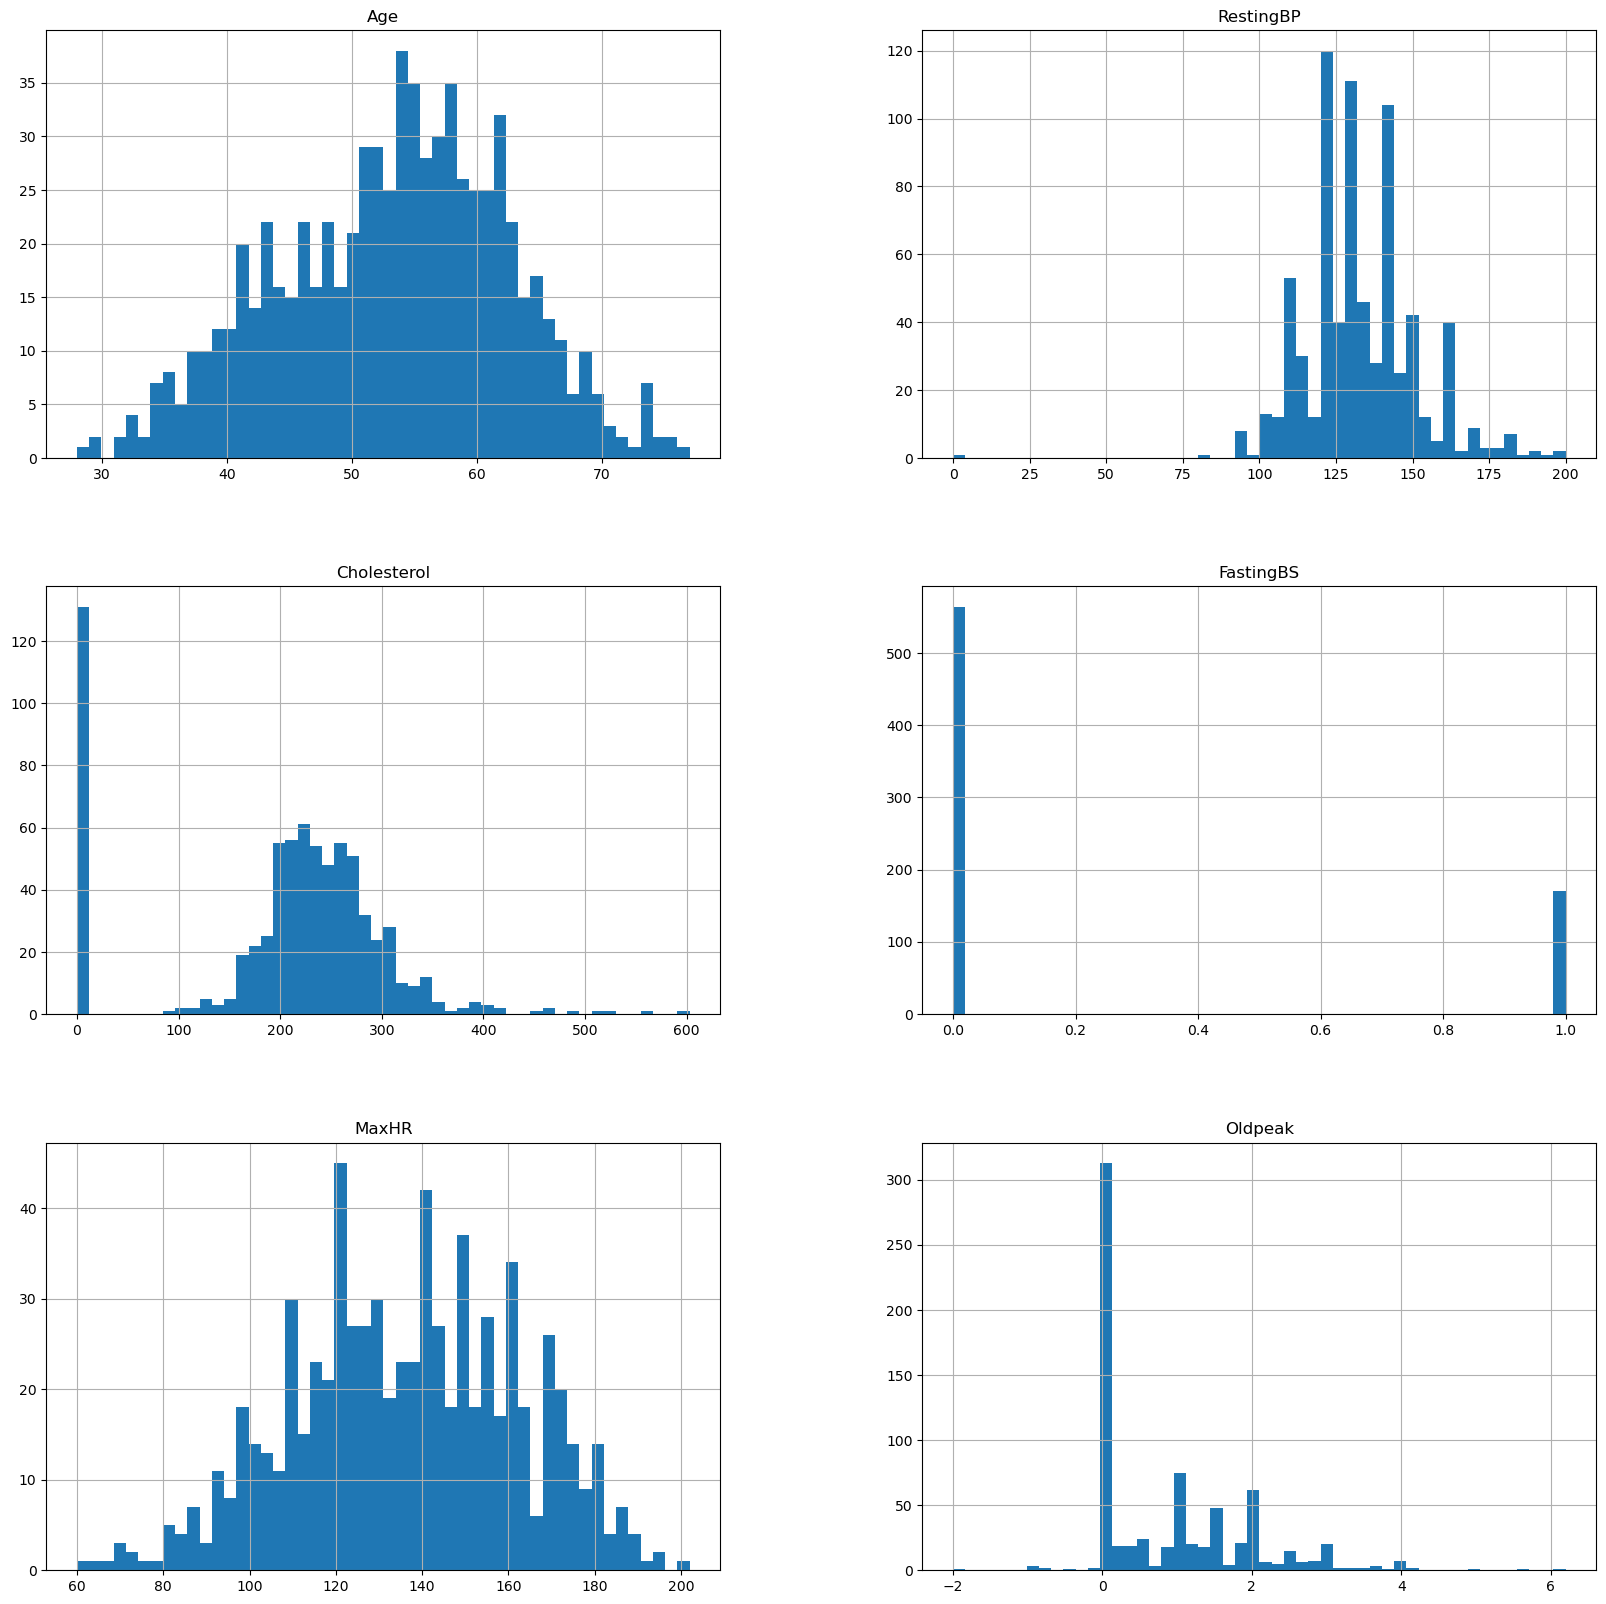

In [14]:
import matplotlib.pyplot as plt

train_cat = train.select_dtypes(include=[np.number])

train_cat.hist(bins=50, figsize=(20, 20))
plt.show()

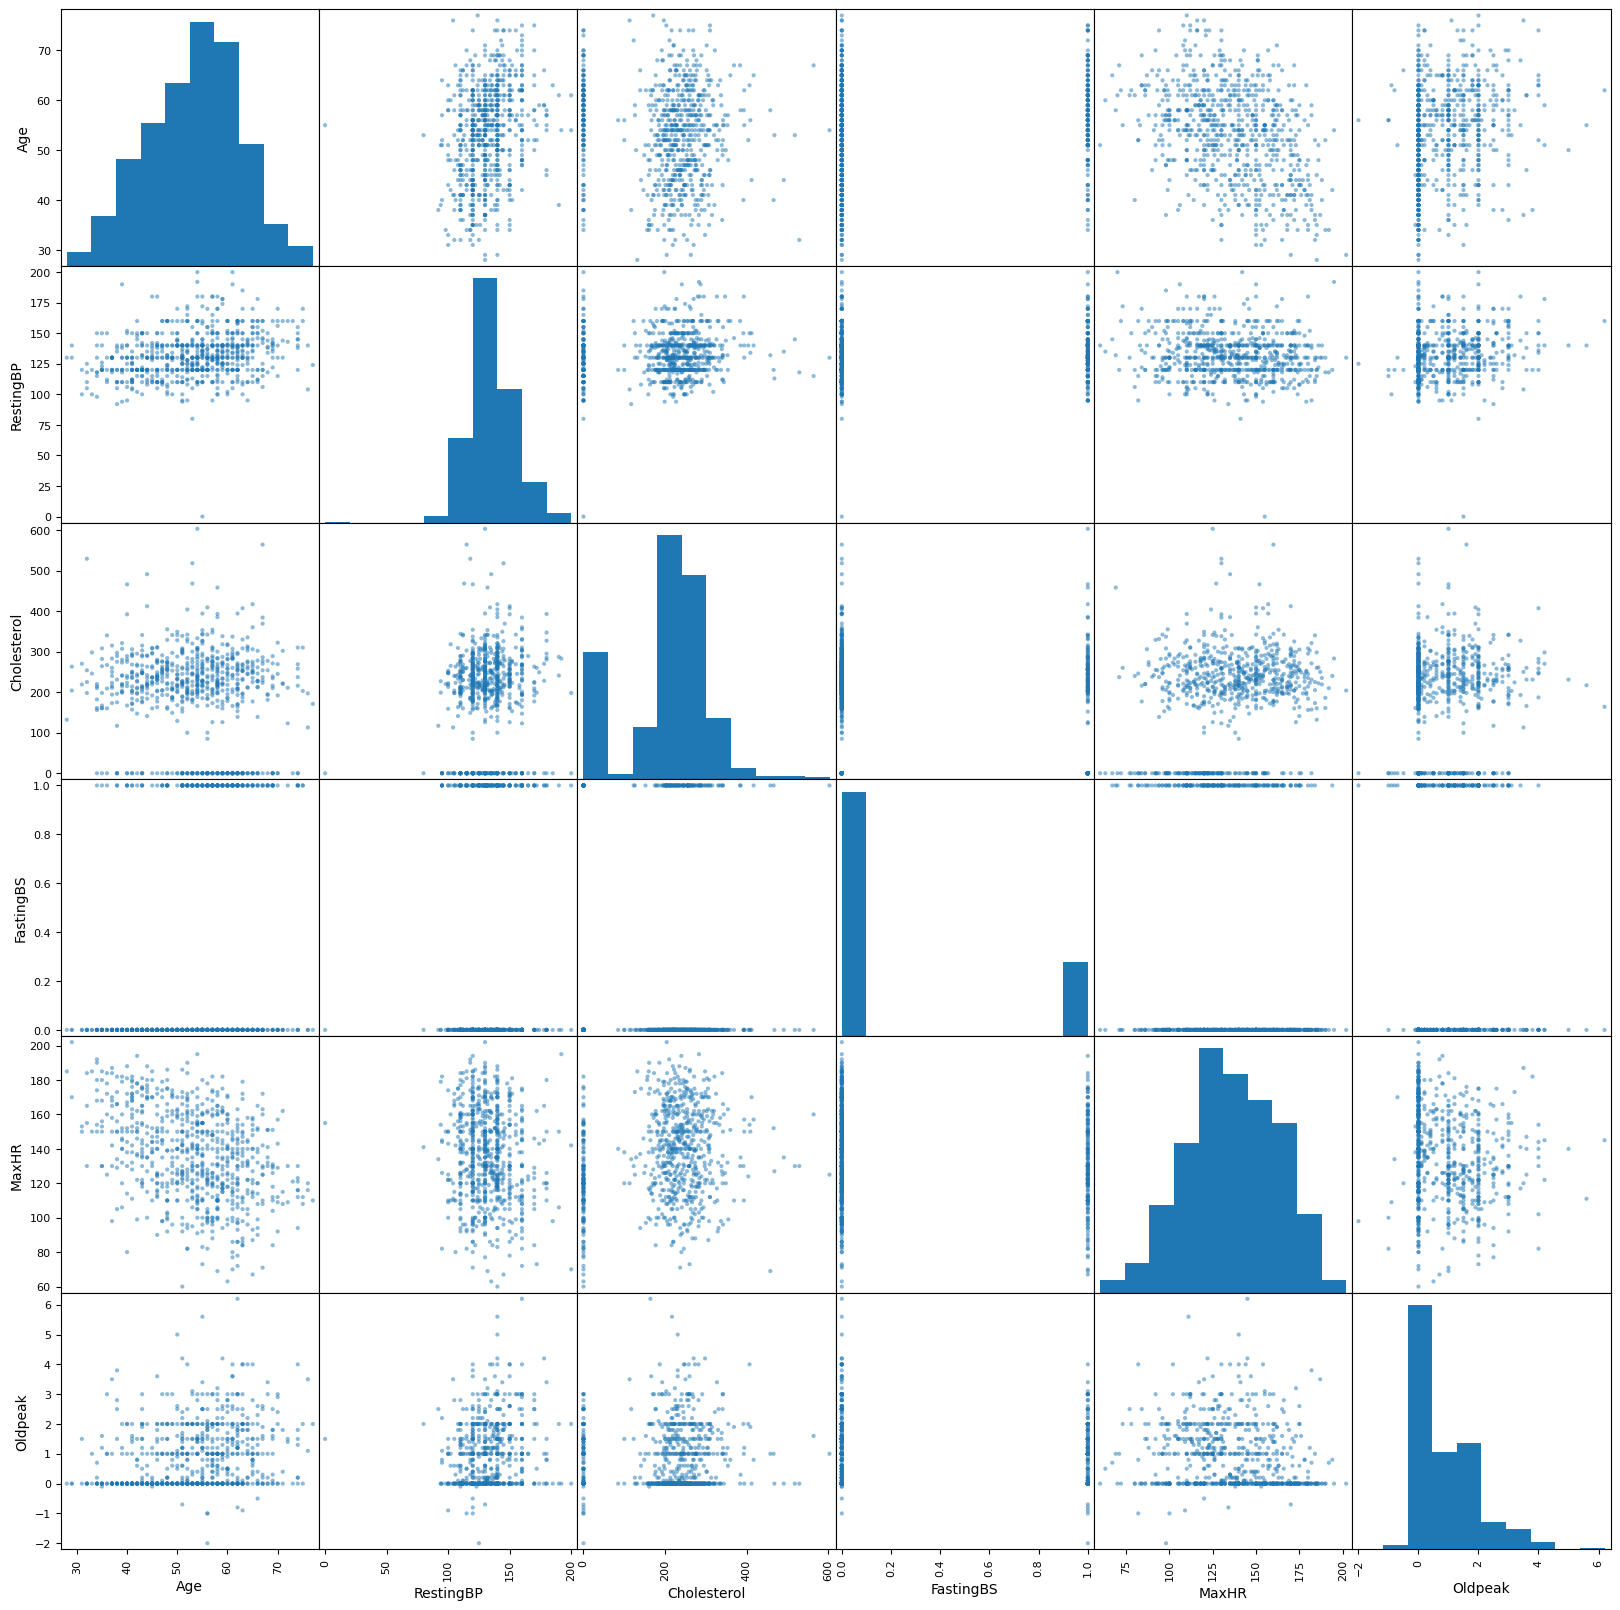

In [15]:
from pandas.plotting import scatter_matrix
import seaborn as sns
train_cat = train.select_dtypes(include=[np.number])


scatter_matrix(train_cat, figsize=(20, 20))
plt.show()


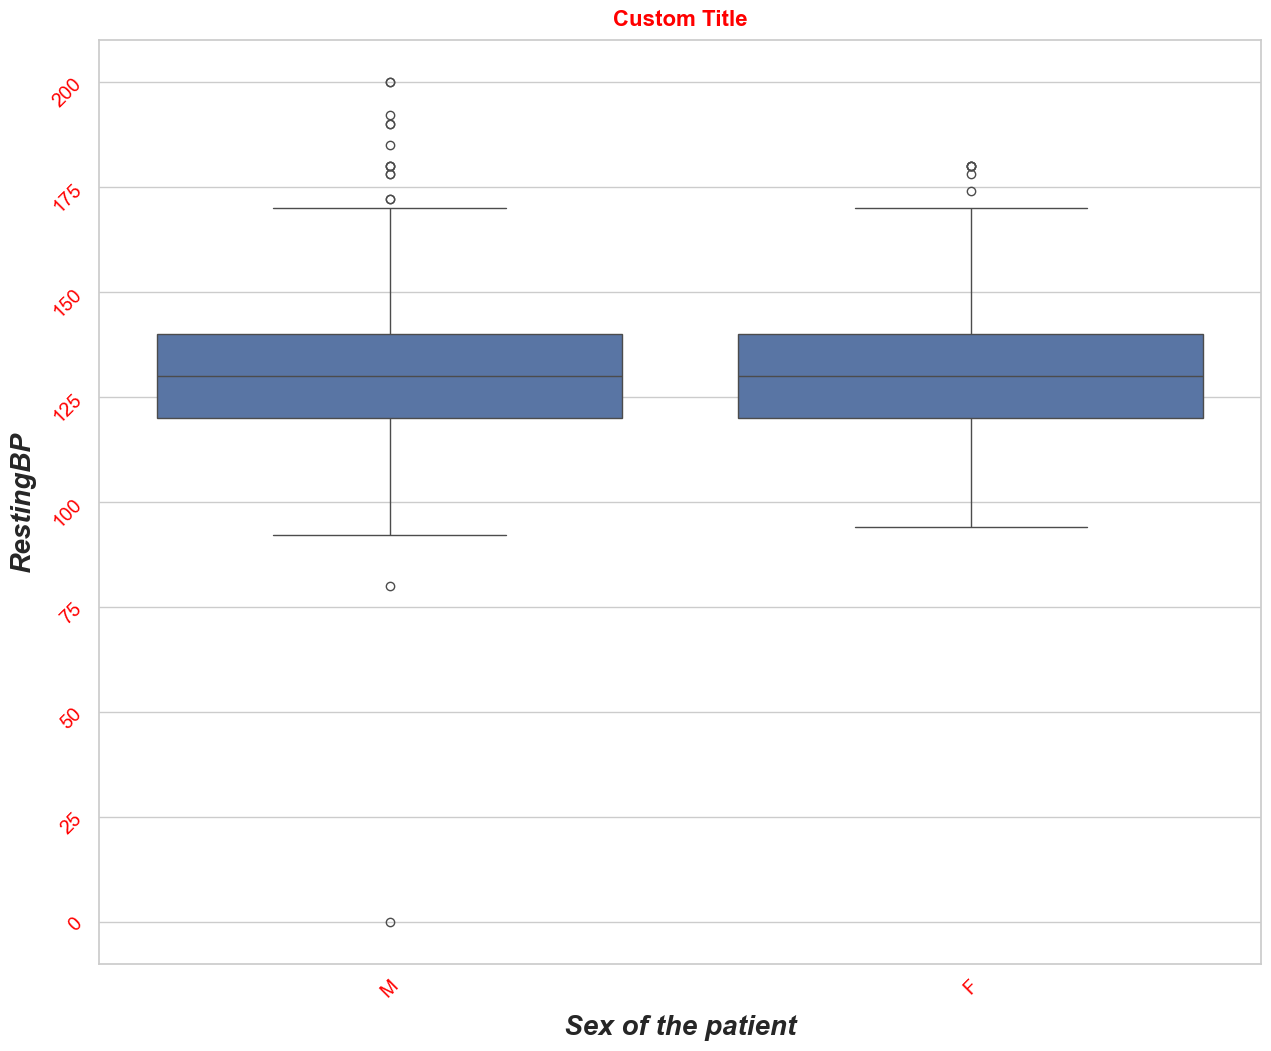

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
# 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'

# Add a dark grid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 12))

# plt.title("Daily Total Bill Distribution")

# Create and display the plot

ax = sns.boxplot(y="RestingBP",
            x="Sex",
            # hue="smoker",
            orient = "v",
            data=train,
            # palette="Set1",
            width=0.8)


ax.set_title(
    "Custom Title",
    fontsize=16,
    color="red",
    pad = 10,
    fontweight="bold",
)


# Customize ticks
ax.tick_params(
    axis='x',          # Apply to x-axis
    which='both',      # Both major and minor ticks
    labelsize=14,      # Font size
    rotation=45,       # Rotate labels (if needed)
    labelcolor='red'   # Optional: Change color
)


ax.tick_params(
    axis='y',          # Apply to x-axis
    which='both',      # Both major and minor ticks
    labelsize=14,      # Font size
    rotation=45,       # Rotate labels (if needed)
    labelcolor='red'   # Optional: Change color
)

ax.set_xlabel(
    "Sex of the patient",
    fontsize=20,
    fontstyle='italic',
    fontweight='bold',
    labelpad=10  # Padding between label and axis
)


ax.set_ylabel(
    "RestingBP",
    fontsize=20,
    fontstyle='italic',
    fontweight='bold',
    labelpad=10  # Padding between label and axis
)

plt.show()


### Test strategy+factory to use plots: ST_Slope variable

  ST_Slope  label  count label_str category
0     Down      0     11         0   Down_0
1     Down      1     38         1   Down_1
2     Flat      0     62         0   Flat_0
3     Flat      1    306         1   Flat_1
4       Up      0    260         0     Up_0
5       Up      1     57         1     Up_1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ST_Slope label_str  Down  Flat   Up label_readable
0                0    11    62  260        Healthy
1                1    38   306   57  Hearth Attack


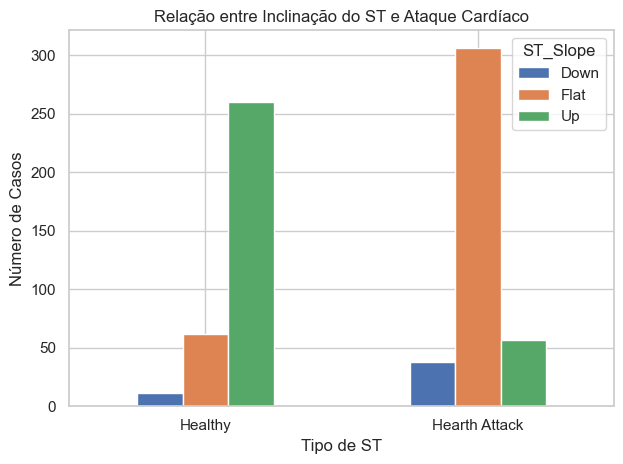

In [17]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BarPlotStrategy import BarPlotStrategy
from charts.BarPlotPandasStrategy import BarPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
bar_strategy = BarPlotPandasStrategy()
factory = PlotFactory(bar_strategy)



plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = plot_df_train.groupby(['ST_Slope', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['ST_Slope'] + "_" + resultado['label_str']


import pandas as pd

# Configurar para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Evita quebra de linha
pd.set_option('display.max_colwidth', None)  # Mostra todo o conteúdo das células


print(resultado.head(10))

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='ST_Slope', 
                                values = 'count').reset_index()



mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
resultado_piv['label_readable'] = resultado_piv['label_str'].map(mapping)

print('--'*100)
print(resultado_piv)

factory.create_plot(
                    data=resultado_piv,
                    x="label_readable",
                    y="count",
                    title="Relação entre Inclinação do ST e Ataque Cardíaco",
                    xlabel="Tipo de ST",
                    ylabel="Número de Casos"
                    )



In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.arange(5)
# y1 = [34, 56, 12, 89, 67]
# y2 = [12, 56, 78, 45, 90]
# width = 0.40

# # plot data in grouped manner of bar type
# plt.bar(x-0.2, y1, width)
# plt.bar(x+0.2, y2, width)

In [19]:
# import matplotlib.pyplot as plt
# import pandas as pd

# df = pd.DataFrame([['A', 10, 20, 10, 30],
#                    ['B', 20, 25, 15, 25], 
#                    ['C', 12, 15, 19, 6],
#                    ['CC', 12, 15, 19, 6],
#                    ['CCC', 12, 15, 19, 6],
#                    ['D', 10, 29, 13, 19]
                   
#                    ],
#                   columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])

# # plot grouped bar chart
# df.plot(x='Team',
#         kind='bar',
#         stacked=False,
#         title='Grouped Bar Graph with dataframe')

### ChestPainType variable

  ChestPainType  label  count label_str category
0           ASY      0     85         0    ASY_0
1           ASY      1    317         1    ASY_1
2           ATA      0    127         0    ATA_0
3           ATA      1     13         1    ATA_1
4           NAP      0    101         0    NAP_0
5           NAP      1     55         1    NAP_1
6            TA      0     20         0     TA_0
7            TA      1     16         1     TA_1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ChestPainType label_str  ASY  ATA  NAP  TA label_readable
0                     0   85  127  101  20        Healthy
1                     1  317   13   55  16  Hearth Attack


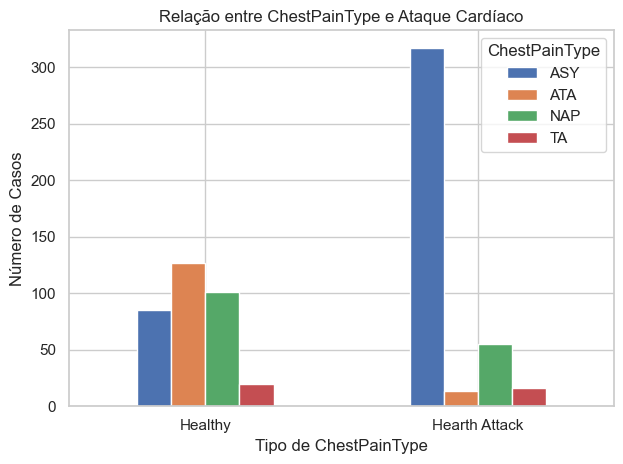

In [20]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BarPlotStrategy import BarPlotStrategy
from charts.BarPlotPandasStrategy import BarPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
bar_strategy = BarPlotPandasStrategy()
factory = PlotFactory(bar_strategy)



plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = plot_df_train.groupby(['ChestPainType', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['ChestPainType'] + "_" + resultado['label_str']


import pandas as pd

# Configurar para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Evita quebra de linha
pd.set_option('display.max_colwidth', None)  # Mostra todo o conteúdo das células


print(resultado.head(10))

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='ChestPainType', 
                                values = 'count').reset_index()



mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
resultado_piv['label_readable'] = resultado_piv['label_str'].map(mapping)

print('--'*100)
print(resultado_piv)

factory.create_plot(
                    data=resultado_piv,
                    x="label_readable",
                    y="count",
                    title="Relação entre ChestPainType e Ataque Cardíaco",
                    xlabel="Tipo de ChestPainType",
                    ylabel="Número de Casos"
                    )



### RestingECG 

  RestingECG  label  count label_str  category
0        LVH      0     68         0     LVH_0
1        LVH      1     83         1     LVH_1
2     Normal      0    223         0  Normal_0
3     Normal      1    232         1  Normal_1
4         ST      0     42         0      ST_0
5         ST      1     86         1      ST_1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RestingECG label_str  LVH  Normal  ST label_readable
0                  0   68     223  42        Healthy
1                  1   83     232  86  Hearth Attack


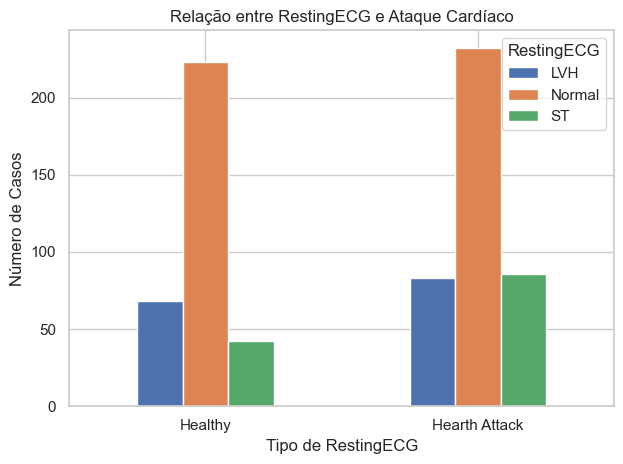

In [21]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BarPlotStrategy import BarPlotStrategy
from charts.BarPlotPandasStrategy import BarPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
bar_strategy = BarPlotPandasStrategy()
factory = PlotFactory(bar_strategy)



plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = plot_df_train.groupby(['RestingECG', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['RestingECG'] + "_" + resultado['label_str']


import pandas as pd

# Configurar para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Evita quebra de linha
pd.set_option('display.max_colwidth', None)  # Mostra todo o conteúdo das células


print(resultado.head(10))

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='RestingECG', 
                                values = 'count').reset_index()



mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
resultado_piv['label_readable'] = resultado_piv['label_str'].map(mapping)

print('--'*100)
print(resultado_piv)

factory.create_plot(
                    data=resultado_piv,
                    x="label_readable",
                    y="count",
                    title="Relação entre RestingECG e Ataque Cardíaco",
                    xlabel="Tipo de RestingECG",
                    ylabel="Número de Casos"
                    )



### RestingBP

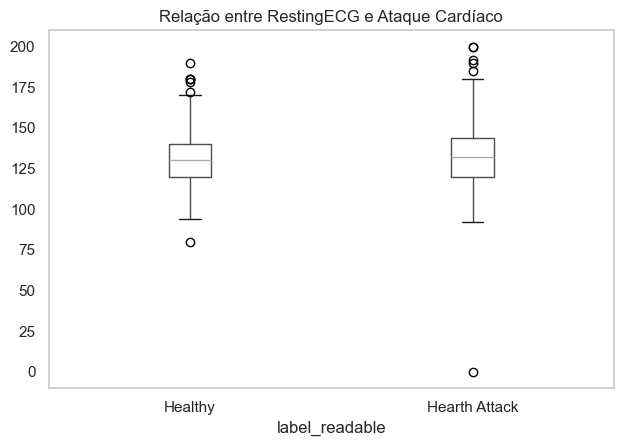

In [22]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BoxPlotPandasStrategy import BoxPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(4)

# plot_df_train = plot_df_train.loc[plot_df_train.label_str == '0',:]


factory.create_plot(
                    data = plot_df_train,
                    x='label_readable',
                    y='RestingBP',
                    title="Relação entre RestingECG e Ataque Cardíaco",
                    xlabel="Tipo de RestingECG",
                    ylabel="RestingBP value"
                    )


### Cholesterol

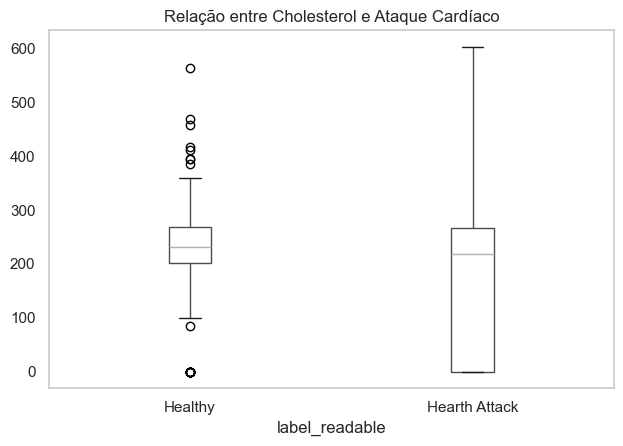

In [23]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BoxPlotPandasStrategy import BoxPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(4)

# plot_df_train = plot_df_train.loc[plot_df_train.label_str == '0',:]
### Cholesterol


factory.create_plot(
                    data = plot_df_train,
                    x='label_readable',
                    y='Cholesterol',
                    title="Relação entre Cholesterol e Ataque Cardíaco",
                    xlabel="Tipo de Cholesterol",
                    ylabel="Cholesterol value"
                    )


### MaxHR

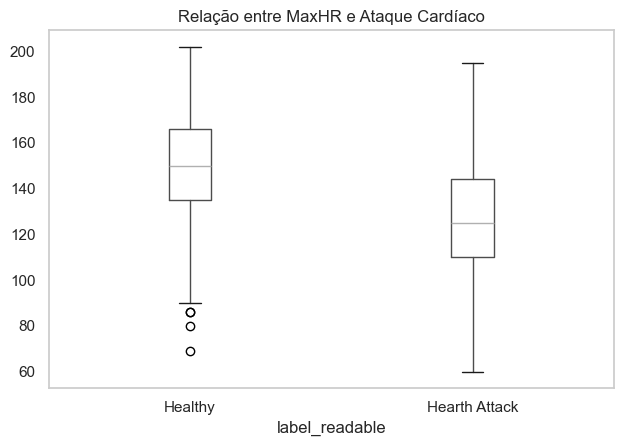

In [24]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BoxPlotPandasStrategy import BoxPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(4)

# plot_df_train = plot_df_train.loc[plot_df_train.label_str == '0',:]


factory.create_plot(
                    data = plot_df_train,
                    x='label_readable',
                    y='MaxHR',
                    title="Relação entre MaxHR e Ataque Cardíaco",
                    xlabel="Tipo de MaxHR",
                    ylabel="MaxHR value"
                    )


### Age

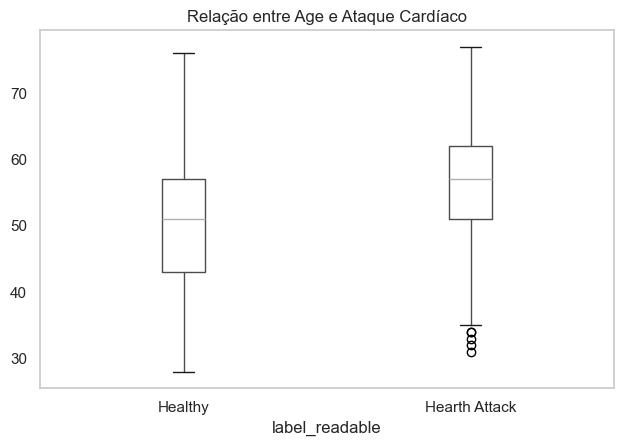

In [25]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BoxPlotPandasStrategy import BoxPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(4)

# plot_df_train = plot_df_train.loc[plot_df_train.label_str == '0',:]


factory.create_plot(
                    data = plot_df_train,
                    x='label_readable',
                    y='Age',
                    title="Relação entre Age e Ataque Cardíaco",
                    xlabel="Tipo de Age",
                    ylabel="Age value"
                    )


### Duas variaveis + target - Sex+Age+target

#### 

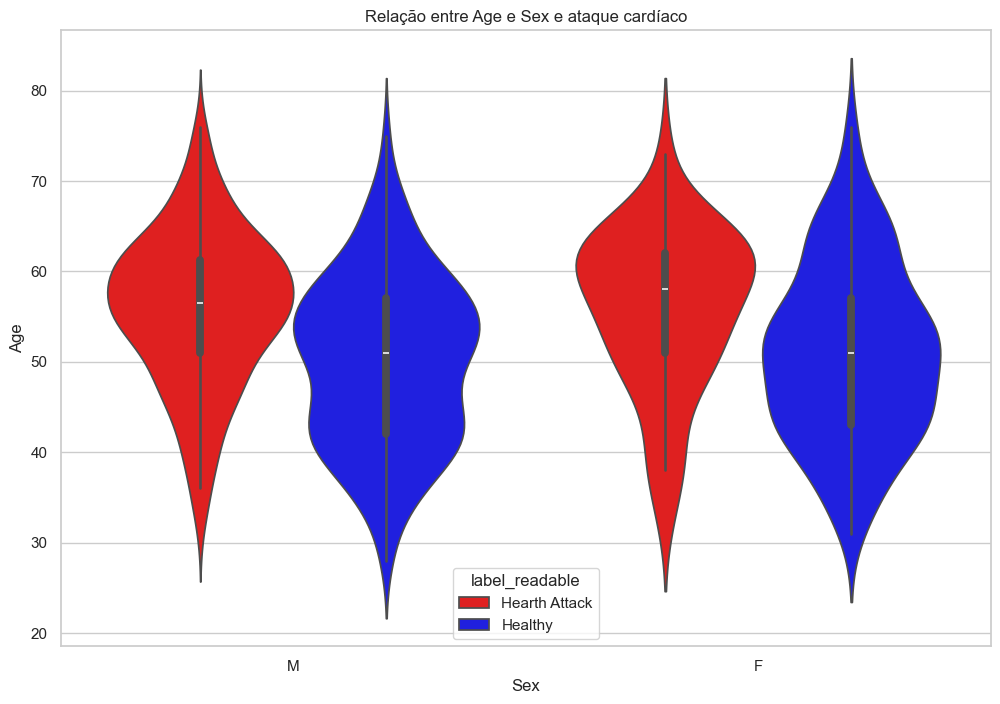

<Figure size 640x480 with 0 Axes>

In [26]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.ViolinPlotSeabornStrategy import ViolinPlotSeabornStrategy
from charts.PlotFactory import PlotFactory


violinplot_strategy = ViolinPlotSeabornStrategy()
factory = PlotFactory(violinplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)

# ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
# 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
# 'label'
# ],

factory.create_plot(
                     data = plot_df_train
                    ,x = 'Sex'
                    ,y = 'Age'
                    ,hue = 'label_readable'
                    ,palette={"Healthy": "blue", "Hearth Attack": "red"}
                    ,title = "Relação entre Age e Sex e ataque cardíaco"
                    ,xlabel = "Sex"
                    ,ylabel = "Age"
                    )

### Duas variaveis + target - Cholesterol+FastingBS+target

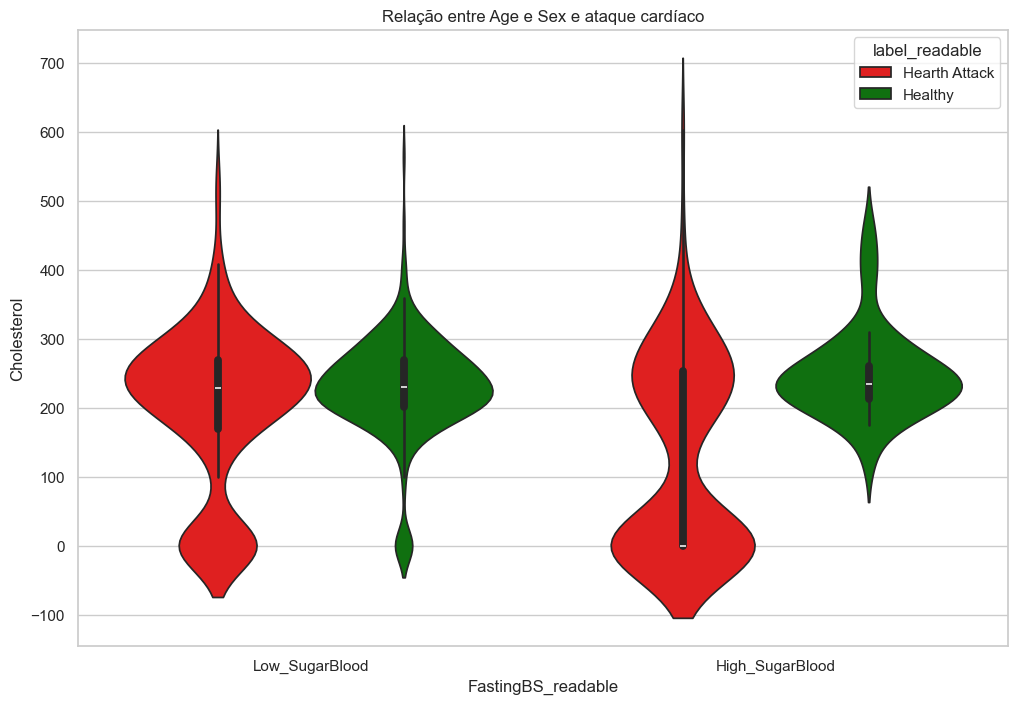

<Figure size 640x480 with 0 Axes>

In [27]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.ViolinPlotSeabornStrategy import ViolinPlotSeabornStrategy
from charts.PlotFactory import PlotFactory


violinplot_strategy = ViolinPlotSeabornStrategy()
factory = PlotFactory(violinplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(3)

# plot_df_train.FastingBS.unique()

mapping = {0: 'Low_SugarBlood', 1: 'High_SugarBlood'}
plot_df_train['FastingBS_readable'] = plot_df_train['FastingBS'].map(mapping)

plot_df_train.head(3)
# plot_df_train.dtypes


# ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
# 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
# 'label'
# ],

factory.create_plot(
                     data = plot_df_train
                    ,x = 'FastingBS_readable'
                    ,y = 'Cholesterol'
                    ,hue = 'label_readable'
                    ,palette = {"Healthy": "green", "Hearth Attack": "red"}
                    ,title = "Relação entre Age e Sex e ataque cardíaco"
                    ,xlabel = "Sex"
                    ,ylabel = "Age"
                    )

In [28]:
resultado = plot_df_train.groupby(['FastingBS', 'label']) \
                                            .agg(count=('label', 'count')) \
                                            .reset_index()


resultado

,FastingBS,label,count
0,0,0,296
1,0,1,268
2,1,0,37
3,1,1,133


### 'MaxHR', 'ExerciseAngina', target


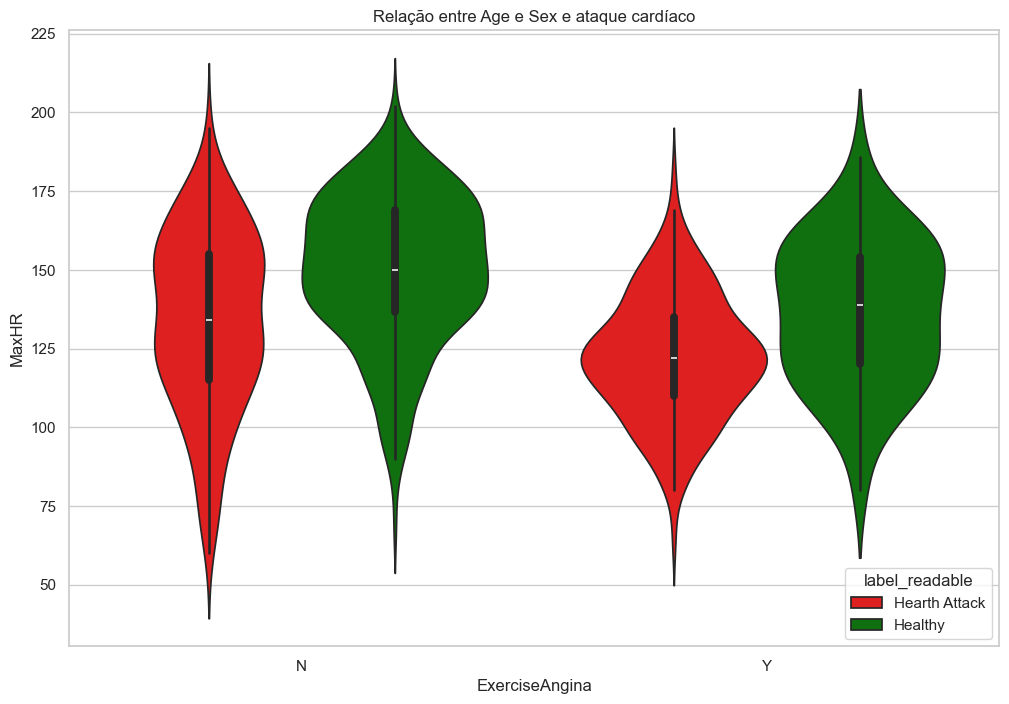

<Figure size 640x480 with 0 Axes>

In [29]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.ViolinPlotSeabornStrategy import ViolinPlotSeabornStrategy
from charts.PlotFactory import PlotFactory


violinplot_strategy = ViolinPlotSeabornStrategy()
factory = PlotFactory(violinplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(3)

# plot_df_train.FastingBS.unique()

mapping = {0: 'Low_SugarBlood', 1: 'High_SugarBlood'}
plot_df_train['FastingBS_readable'] = plot_df_train['FastingBS'].map(mapping)

plot_df_train.head(3)
# plot_df_train.dtypes


# ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
# 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
# 'label'
# ],

factory.create_plot(
                     data = plot_df_train
                    ,x = 'ExerciseAngina'
                    ,y = 'MaxHR'
                    ,hue = 'label_readable'
                    ,palette = {"Healthy": "green", "Hearth Attack": "red"}
                    ,title = "Relação entre Age e Sex e ataque cardíaco"
                    ,xlabel = "Sex"
                    ,ylabel = "Age"
                    )

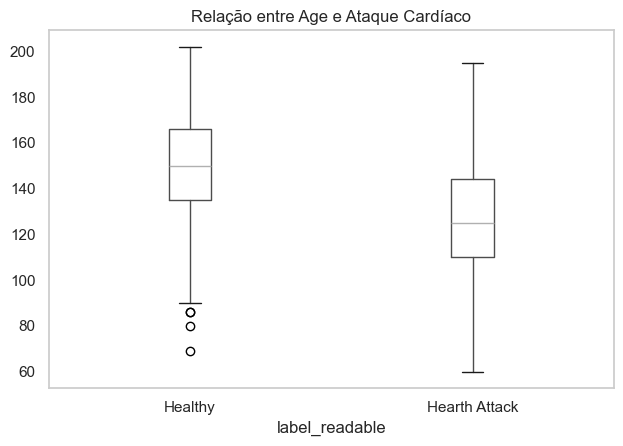

In [30]:
import sys
import os
# Adiciona o diretório acima ao PATH do Python
sys.path.append(os.path.abspath(os.path.join('..')))

from charts.BoxPlotPandasStrategy import BoxPlotPandasStrategy
from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)


plot_df_train = pd.concat([train, train_label], axis = 1)


plot_df_train['label_str'] = plot_df_train['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
plot_df_train['label_readable'] = plot_df_train['label_str'].map(mapping)


# plot_df_train.head(4)

# plot_df_train = plot_df_train.loc[plot_df_train.label_str == '0',:]


factory.create_plot(
                    data = plot_df_train,
                    x='label_readable',
                    y='MaxHR',
                    title="Relação entre Age e Ataque Cardíaco",
                    xlabel="Tipo de Age",
                    ylabel="Age value"
                    )



# factory.create_plot(
#                      data = plot_df_train
#                     ,x = 'ExerciseAngina'
#                     ,y = 'MaxHR'
#                     ,hue = 'label_readable'
#                     ,palette = {"Healthy": "green", "Hearth Attack": "red"}
#                     ,title = "Relação entre Age e Sex e ataque cardíaco"
#                     ,xlabel = "Sex"
#                     ,ylabel = "Age"
#                     )

In [31]:
 plot_df_train.loc[:,  ['ExerciseAngina',	'Oldpeak',	'ST_Slope', 'ChestPainType', 'label']].head(4)


resultado = plot_df_train.groupby(['ExerciseAngina',	'ST_Slope', 'ChestPainType', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()

# df.sort_values(by='Age', kind='mergesort')

# resultado.sort_values(by=['label', 'count'], kind='mergesort',ascending=False, inplace=True)
resultado.sort_values(by=['ExerciseAngina',	'ST_Slope',	'ChestPainType'], kind='mergesort',ascending=False, inplace=True)

resultado.loc[resultado['count'] >10, :]

,ExerciseAngina,ST_Slope,ChestPainType,label,count
36,Y,Up,ASY,1,26
32,Y,Flat,NAP,1,24
27,Y,Flat,ASY,0,12
28,Y,Flat,ASY,1,162
24,Y,Down,ASY,1,28
21,N,Up,TA,0,11
19,N,Up,NAP,0,67
17,N,Up,ATA,0,110
15,N,Up,ASY,0,50
16,N,Up,ASY,1,22


In [32]:
plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = plot_df_train.groupby(['RestingECG', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['RestingECG'] + "_" + resultado['label_str']


import pandas as pd

# Configurar para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Evita quebra de linha
pd.set_option('display.max_colwidth', None)  # Mostra todo o conteúdo das células


print(resultado.head(10))

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='RestingECG', 
                                values = 'count').reset_index()


  RestingECG  label  count label_str  category
0        LVH      0     68         0     LVH_0
1        LVH      1     83         1     LVH_1
2     Normal      0    223         0  Normal_0
3     Normal      1    232         1  Normal_1
4         ST      0     42         0      ST_0
5         ST      1     86         1      ST_1


#### Tabela de contingencia

In [33]:
import pandas as pd

# ExerciseAngina	ST_Slope	ChestPainType	label

# Exemplo com 3 variáveis categóricas
tabela_3d = pd.crosstab(
                        index=plot_df_train['label'],
                        columns=[plot_df_train['ExerciseAngina'], 
                                 plot_df_train['ST_Slope'],
                                 plot_df_train['ChestPainType']],
                        margins=True  # Mostra totais
                       )



display(tabela_3d)

ExerciseAngina    N                                                 Y      \
ST_Slope       Down            Flat              Up              Down       
ChestPainType   ASY ATA NAP TA  ASY ATA NAP  TA ASY  ATA NAP  TA  ASY NAP   
label                                                                       
0                 1   1   3  3   11   8  18   4  50  110  67  11    2   1   
1                 4   0   2  1   75   5  21  10  22    2   5   2   28   3   
All               5   1   5  4   86  13  39  14  72  112  72  13   30   4   

ExerciseAngina                                 All  
ST_Slope       Flat             Up                  
ChestPainType   ASY ATA NAP TA ASY ATA NAP TA       
label                                               
0                12   2   6  1   9   6   6  1  333  
1               162   6  24  3  26   0   0  0  401  
All             174   8  30  4  35   6   6  1  734

                  Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age          1.000000   0.260248    -0.114745   0.219393 -0.397349  0.258374   
RestingBP    0.260248   1.000000     0.111529   0.082705 -0.125322  0.167647   
Cholesterol -0.114745   0.111529     1.000000  -0.236805  0.241451  0.036255   
FastingBS    0.219393   0.082705    -0.236805   1.000000 -0.127742  0.062630   
MaxHR       -0.397349  -0.125322     0.241451  -0.127742  1.000000 -0.175522   
Oldpeak      0.258374   0.167647     0.036255   0.062630 -0.175522  1.000000   
label        0.289306   0.125329    -0.250785   0.260289 -0.410133  0.429987   

                label  
Age          0.289306  
RestingBP    0.125329  
Cholesterol -0.250785  
FastingBS    0.260289  
MaxHR       -0.410133  
Oldpeak      0.429987  
label        1.000000  


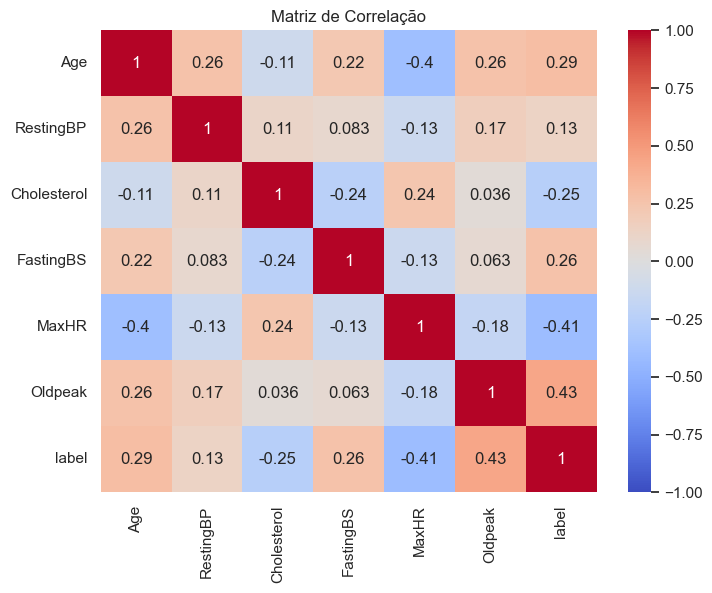

In [34]:
# Lista das colunas categóricas
train_num = plot_df_train.select_dtypes(include=[np.number])
num_cols = train_num.columns


matriz_correlacao = train_num.corr()
print(matriz_correlacao)

# como heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

#### distribuição dos dados

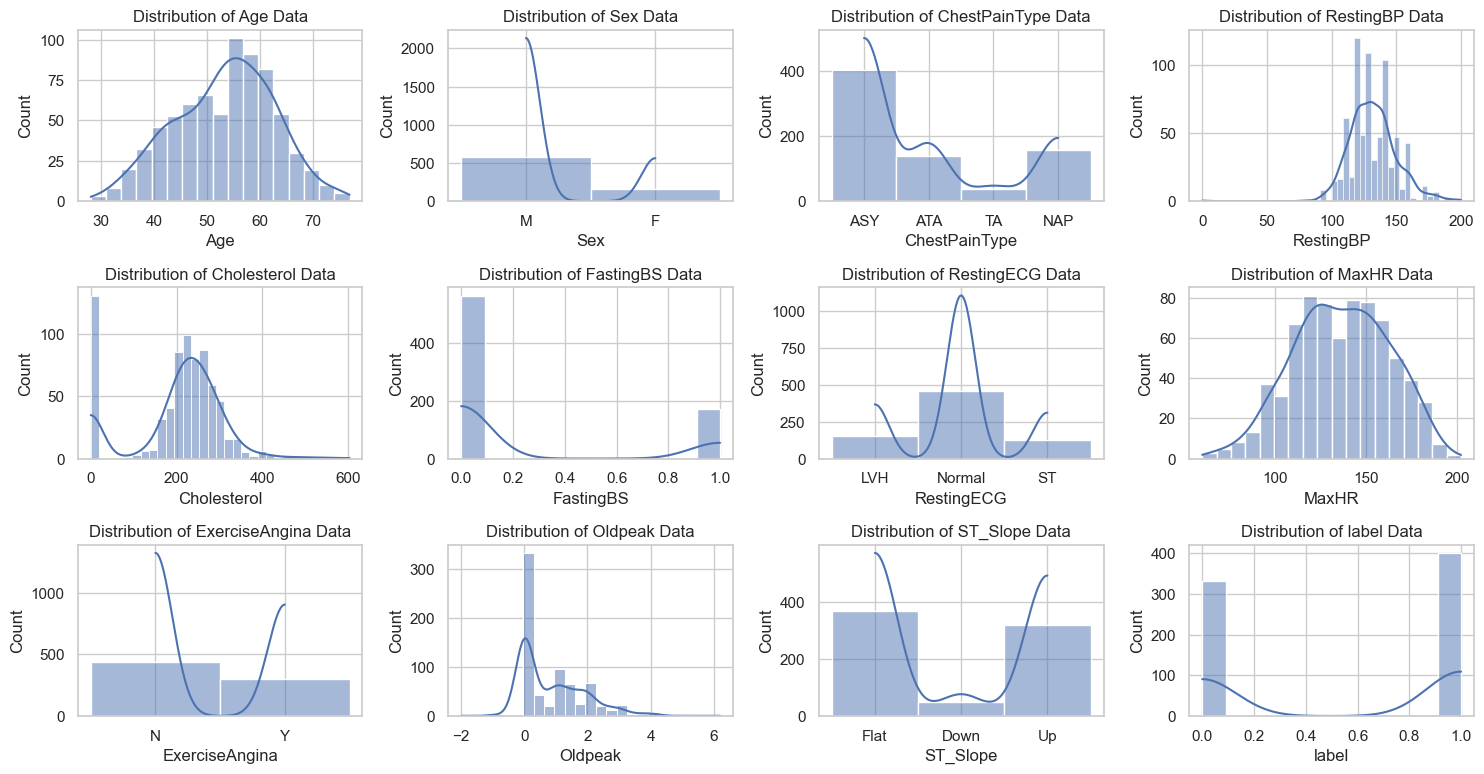

In [35]:
plt.figure(figsize=(15,10))
for i,col in enumerate(plot_df_train.columns,1):
    # print(i)
    # print(col)
    plt.subplot(4,4,i)
    # plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(plot_df_train[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [36]:

# plot_df_train.columns

# plt.figure(figsize=(15,10))
# sns.pairplot(plot_df_train,hue="label_readable")
# plt.title("Looking for Insites in Data")
# plt.legend("Hearth Disease")
# plt.tight_layout()
# plt.plot()